### Using Siphon to query the NetCDF Subset Service


Objectives:
1. Employ Siphon's NCSS class investigate the metadata of SIO and NDBC THREDDS Data Servers (TDS)
2. To retrieve data from SIO and NDBC THREDDS Data Servers (TDS)
3. Plot a map using numpy arrays, matplotlib, and cartopy.

Introduction:
Siphon is a python package that makes it possible to download data from Unidata data technologies. Here we will compare the data availability in 2 different TDS servers that distribute HFR data.  We will first assess the metadata availableo on each server and then attempt to sub set identical regions of data, plot them and compare them.

**But first!**
Bookmark these resources for when you want to use Siphon later:
+ [latest Siphon documentation](http://siphon.readthedocs.org/en/latest/)
+ [Siphon github repo](https://github.com/Unidata/siphon)
+ [TDS documentation](http://www.unidata.ucar.edu/software/thredds/v4.6/tds/TDS.html)
+ [netCDF subset service documentation](http://www.unidata.ucar.edu/software/thredds/current/tds/reference/NetcdfSubsetServiceReference.html)

### Let's get started!

First, we'll import the TDSCatalog class from Siphon and put the special 'matplotlib' line in so our map will show up later in the notebook. Let's construct an instance of TDSCatalog pointing to our dataset of interest.

Starting with east coast and Gulf of Mexico 1km resolution HF Radar data

In [1]:
from siphon.catalog import TDSCatalog

NDBC_HFR = TDSCatalog('http://sdf.ndbc.noaa.gov/thredds/'
                      'catalog.xml?dataset=hfradar_usegc_1km')
print('NDBC:')
print('\n'.join(NDBC_HFR.datasets.keys()))

NDBC:
US East Coast and Gulf of Mexico 1km resolution HF Radar data


In [2]:
SIO_HFR = TDSCatalog('http://hfrnet.ucsd.edu/thredds/'
                     'HFRADAR_USEGC_hourly_RTV.xml?dataset=HFRNet/USEGC/1km/hourly/RTV')
print('SIO:')
print('\n'.join(SIO_HFR.datasets.keys()))

SIO:
HFRADAR, US East and Gulf Coast, 1km Resolution, Hourly RTV


### Metadata.

In [3]:
NDBC_HFR.metadata

{'authority': ['unidata.ucar.edu:'],
 'dataFormat': 'netCDF',
 'dataType': 'GRID',
 'inherited': True,
 'serviceName': 'aggregation'}

In [4]:
SIO_HFR.metadata

{'creator': [{}],
 'dataFormat': 'netCDF',
 'dataType': 'GRID',
 'documentation': {'Rights': ['This is a research project and may contain errors. Please contact the providers of this data to ensure accurate values before making any critical judgements.'],
  'xlink': [{'href': 'http://cordc.ucsd.edu/projects/mapping/',
    'title': 'HFRNet Documentation'},
   {'href': 'http://www.sccoos.org/meta/browse',
    'title': 'View FGDC metadata for HFRADAR site installations'}]},
 'inherited': True,
 'serviceName': 'allServices',
 'timeCoverage': [{}]}

### First we pull out this dataset and look at the access URLs. Note there are many ways to access the data. Both site appear to be the same except SIO has WMS access.

In [5]:
NDBC_ds = list(NDBC_HFR.datasets.values())[0]

NDBC_ds.access_urls

{'ISO': 'http://sdf.ndbc.noaa.gov/thredds/iso/hfradar_usegc_1km',
 'NCML': 'http://sdf.ndbc.noaa.gov/thredds/ncml/hfradar_usegc_1km',
 'NetcdfSubset': 'http://sdf.ndbc.noaa.gov/thredds/ncss/grid/hfradar_usegc_1km',
 'OPENDAP': 'http://sdf.ndbc.noaa.gov/thredds/dodsC/hfradar_usegc_1km',
 'UDDC': 'http://sdf.ndbc.noaa.gov/thredds/uddc/hfradar_usegc_1km',
 'WCS': 'http://sdf.ndbc.noaa.gov/thredds/wcs/hfradar_usegc_1km'}

In [6]:
SIO_ds = list(SIO_HFR.datasets.values())[0]

SIO_ds.access_urls

{'ISO': 'http://hfrnet.ucsd.edu/thredds/iso/HFRNet/USEGC/1km/hourly/RTV',
 'NCML': 'http://hfrnet.ucsd.edu/thredds/ncml/HFRNet/USEGC/1km/hourly/RTV',
 'NetcdfSubset': 'http://hfrnet.ucsd.edu/thredds/ncss/grid/HFRNet/USEGC/1km/hourly/RTV',
 'OPENDAP': 'http://hfrnet.ucsd.edu/thredds/dodsC/HFRNet/USEGC/1km/hourly/RTV',
 'UDDC': 'http://hfrnet.ucsd.edu/thredds/uddc/HFRNet/USEGC/1km/hourly/RTV',
 'WCS': 'http://hfrnet.ucsd.edu/thredds/wcs/HFRNet/USEGC/1km/hourly/RTV',
 'WMS': 'http://hfrnet.ucsd.edu/thredds/wms/HFRNet/USEGC/1km/hourly/RTV'}

### The `NetcdfSubset` entry is what we're after...we'll use this in our NCSS class. Let's import the NCSS class from Siphon and then pass in the NetcdfSubset access url. 

In [7]:
from siphon.ncss import NCSS

NDBC_ncss = NCSS(NDBC_ds.access_urls['NetcdfSubset'])
SIO_ncss = NCSS(SIO_ds.access_urls['NetcdfSubset'])

### Now we can start talking to the data to see what our spatial and time limits are as well as the variables available.  

### First we will check NDBC

In [8]:
NDBC_ncss.metadata.time_span

{'begin': '2016-08-25T23:00:00Z', 'end': '2016-08-30T23:00:00Z'}

In [9]:
NDBC_ncss.metadata.lat_lon_box

{'east': -57.1924, 'north': 46.4944, 'south': 21.7, 'west': -97.8838}

In [10]:
NDBC_ncss.variables

{'DOPx', 'DOPy', 'u', 'v'}

### Now lets check Scripps

In [11]:
SIO_ncss.metadata.time_span

{'begin': '2012-01-01T00:00:00Z', 'end': '2016-08-30T22:00:00Z'}

In [12]:
SIO_ncss.metadata.lat_lon_box

{'east': -57.1924, 'north': 46.4944, 'south': 21.7, 'west': -97.8838}

In [13]:
SIO_ncss.variables

{'DOPx', 'DOPy', 'u', 'v'}

Both sites have the same variables and spatial extent but NDBC only has data from the last 6 days. SIO has data from January 1, 2012 'till today.

Now we can then use the `ncss` objects to create a new query object, which facilitates asking for data from the server.

In [14]:
NDBC_query = NDBC_ncss.query()

SIO_query = SIO_ncss.query()

We construct a query asking for data corresponding to a latitude and longitude box for the mid-Atlantic where 42 lat is the northern extent, 35 lat is the southern extent, -80  long is the western extent and -69 is the eastern extent. 

In [15]:
from datetime import datetime, timedelta

pos = dict(north=42, south=40.5, west=-72.6, east=-71)
end = datetime.utcnow()
start =  end - timedelta(days=3)

NDBC_query.lonlat_box(**pos)
NDBC_query.time_range(start=start, end=end)
NDBC_query.variables('u', 'v')

SIO_query.lonlat_box(**pos)
SIO_query.time_range(start=start, end=end)
SIO_query.variables('u', 'v')

var=v&var=u&time_start=2016-08-28T00%3A22%3A16.329665&time_end=2016-08-31T00%3A22%3A16.329665&east=-71&north=42&south=40.5&west=-72.6

We now request data from the server using this query. The `NCSS` class handles parsing this NetCDF data (using the `netCDF4` module). If we print out the variable names, we see our requested variables, as well as a few others (more metadata information)

In [16]:
NDBCdata = NDBC_ncss.get_data(NDBC_query)

list(NDBCdata.variables.keys())

['v', 'time', 'lat', 'lon', 'u']

In [17]:
SIOdata = SIO_ncss.get_data(SIO_query)

list(SIOdata.variables.keys())

['v', 'time_run', 'time', 'lat', 'lon', 'u']

In [18]:
%matplotlib inline

import numpy.ma as ma
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

from cmocean import cm


def parse_data(data):
    u = ma.masked_invalid(data['u'][:])
    v = ma.masked_invalid(data['v'][:])
    speed = ma.sqrt(u**2 + v**2)
    lon = data['lon'][:]
    lat = data['lat'][:]
    
    time = data['time'][:]
    time = [''.join(t.astype(str).tolist()) for t in time]
    
    return dict(u=u, v=v, speed=speed, lon=lon, lat=lat, time=time)

### First let's check a single time step from both sources.

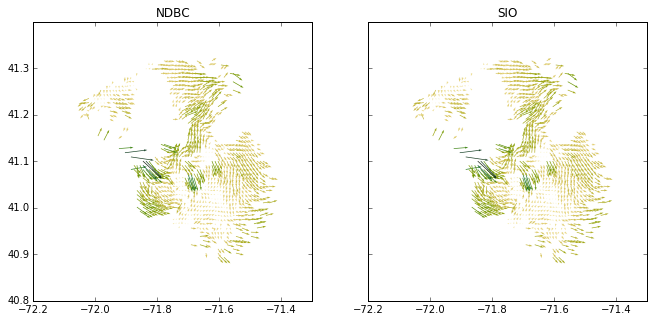

In [19]:
fig, (ax0, ax1) = plt.subplots(figsize=(11, 5), ncols=2,
                              sharex=True, sharey=True)

k = 0
scale = 10
ndbc_ds = parse_data(NDBCdata)
sio_ds = parse_data(SIOdata)

ax0.set_title('NDBC')
ax0.quiver(ndbc_ds['lon'], ndbc_ds['lat'],
           ndbc_ds['u'][k, ...], ndbc_ds['v'][k, ...],
           ndbc_ds['speed'][k, ...], scale=scale, cmap=cm.speed)

ax1.set_title('SIO')
ax1.quiver(sio_ds['lon'], sio_ds['lat'],
           sio_ds['u'][k, ...], sio_ds['v'][k, ...],
           sio_ds['speed'][k, ...], scale=scale, cmap=cm.speed)

axis = ax0.axis([-72.2, -71.3,40.8, 41.4])

### Now let's animate 3 days of NDBC HF-Radar data.


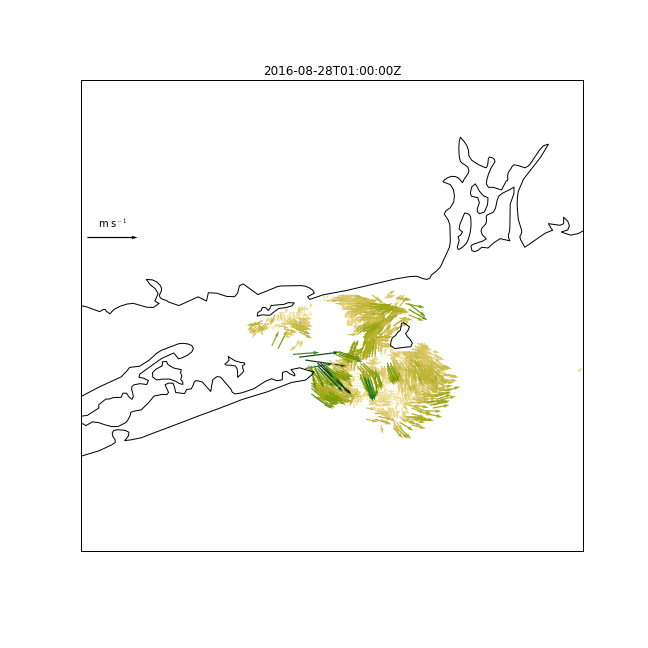
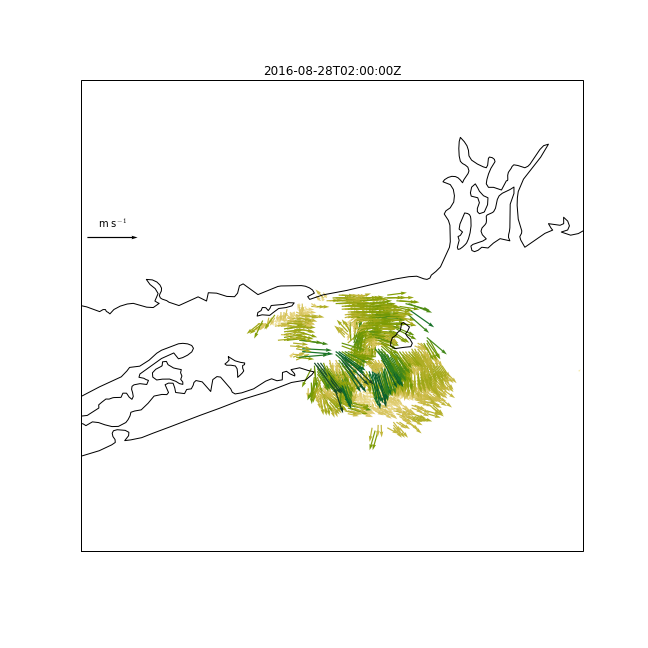
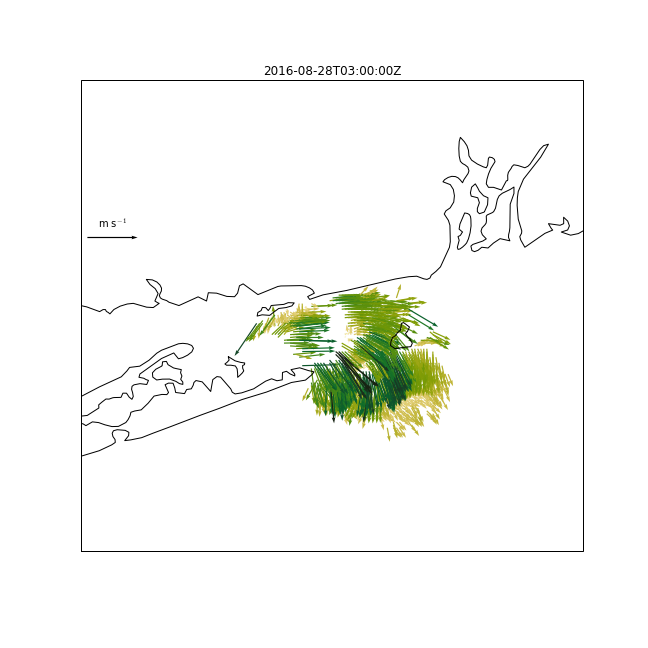
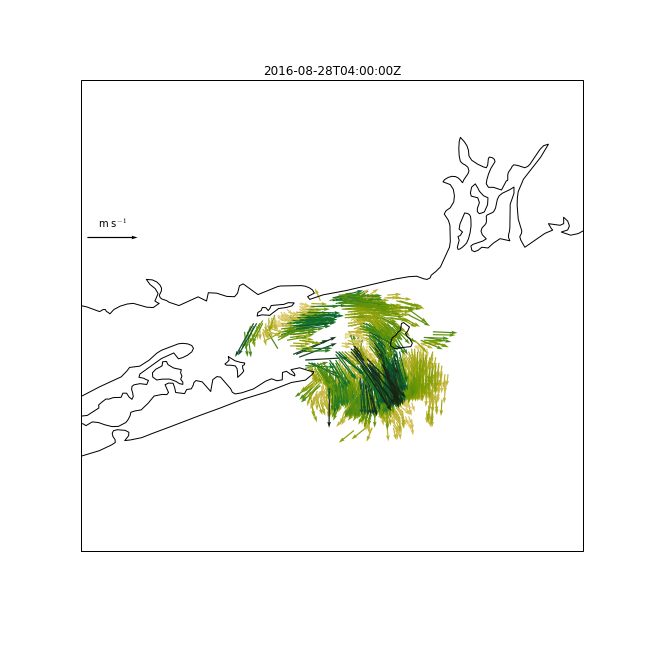
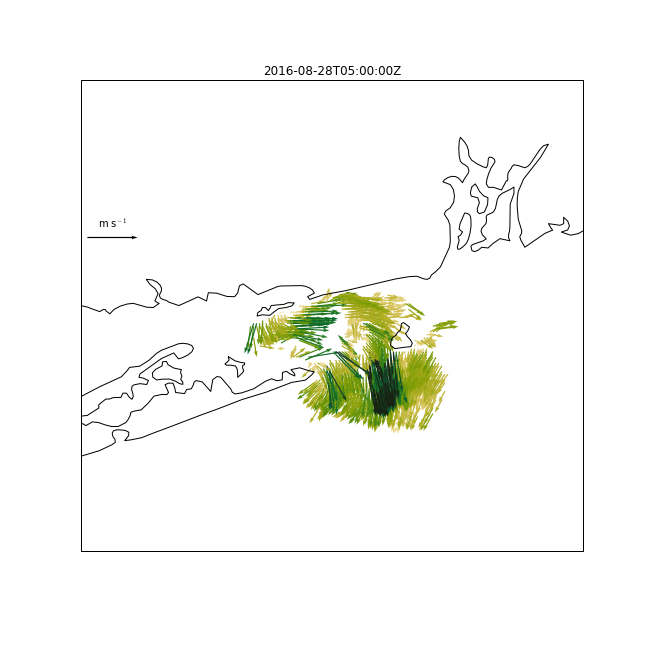
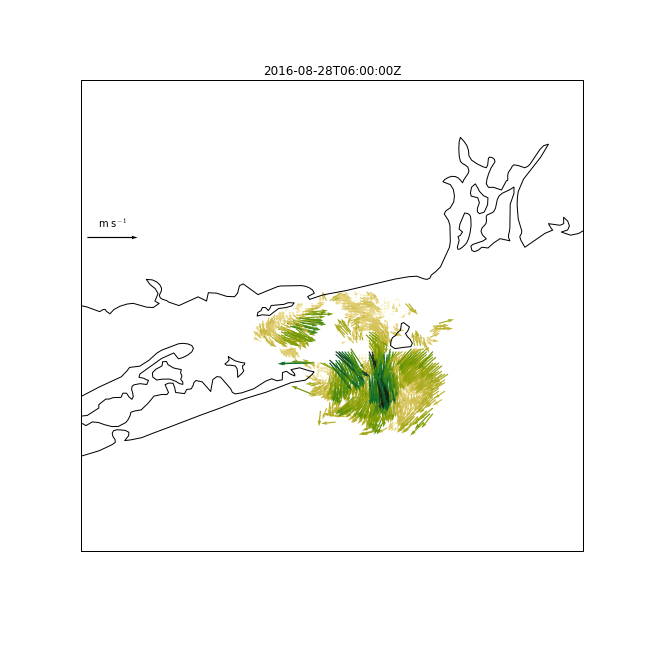
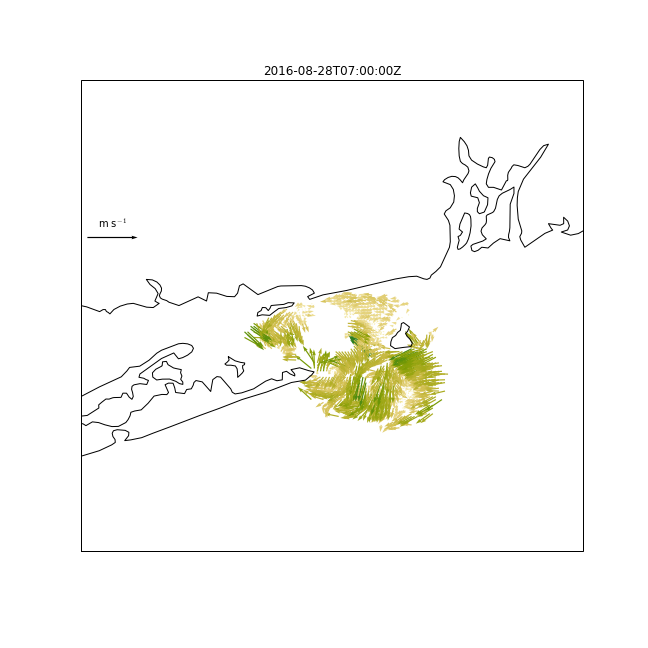
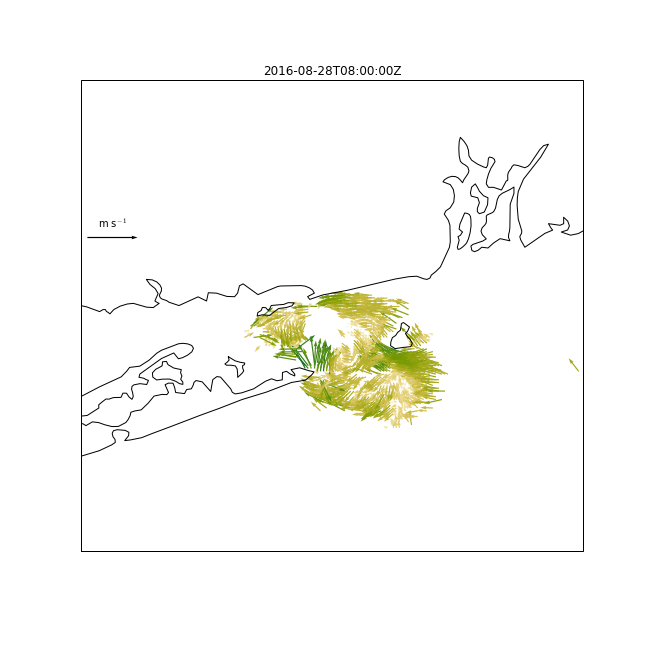
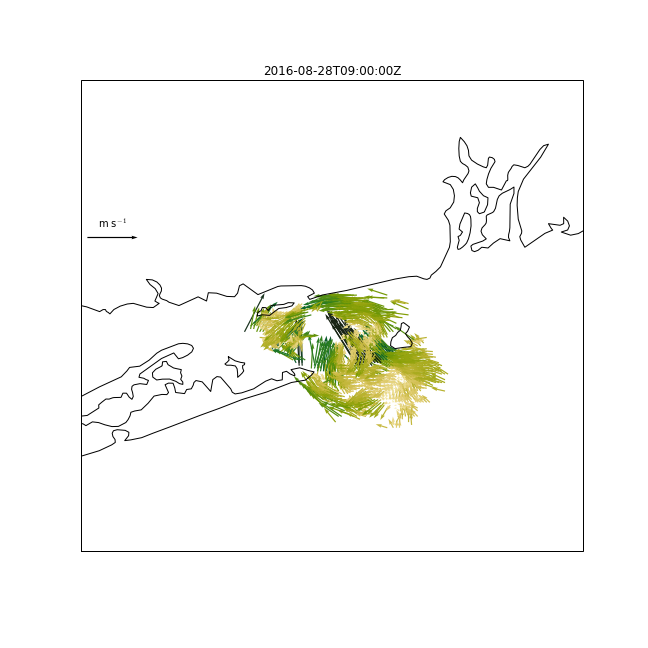
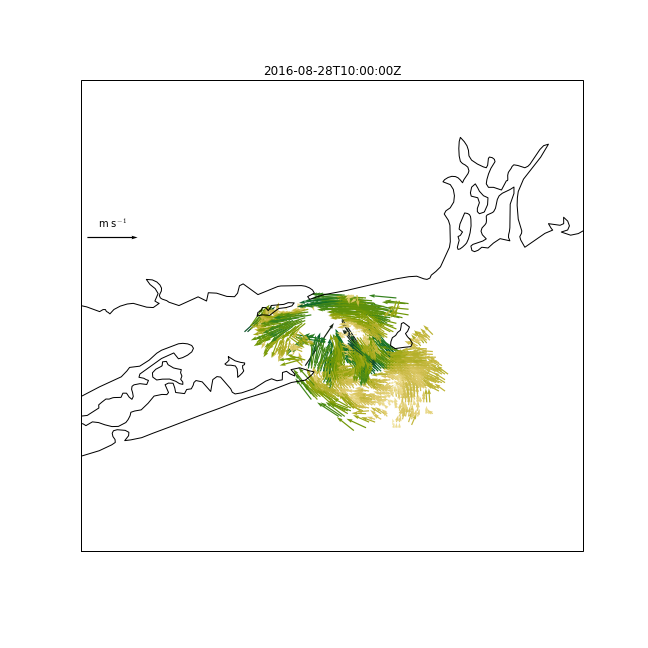
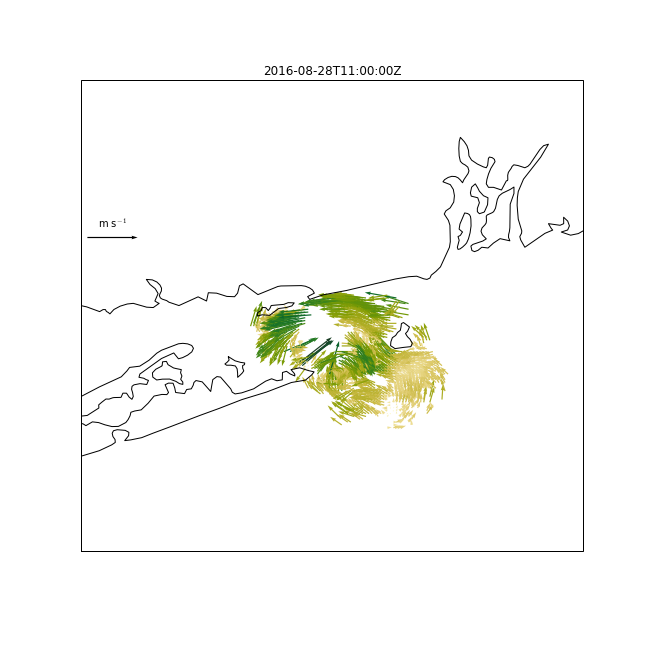
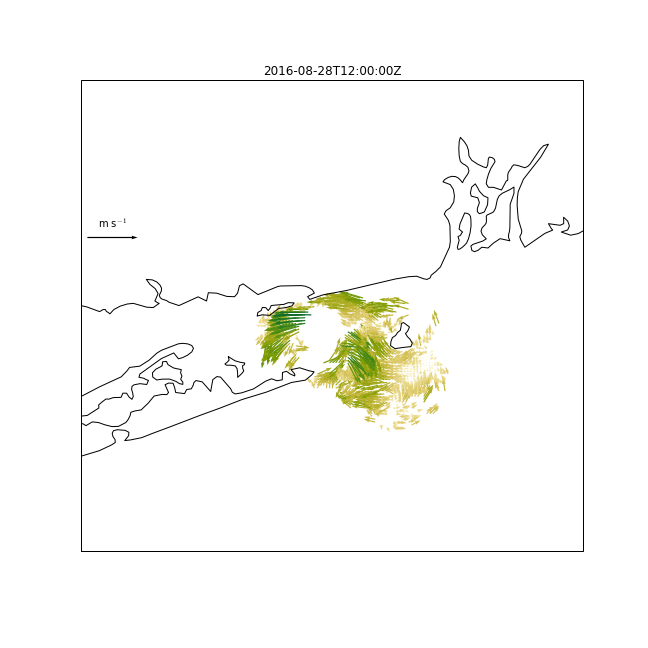
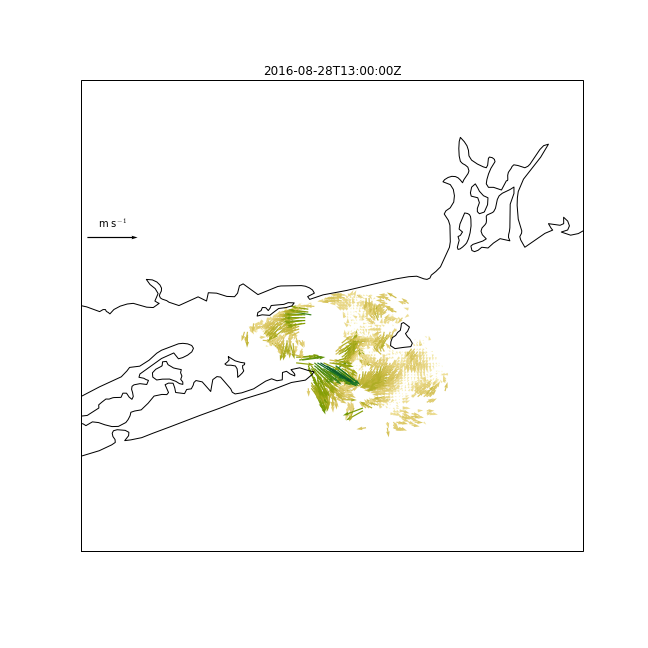
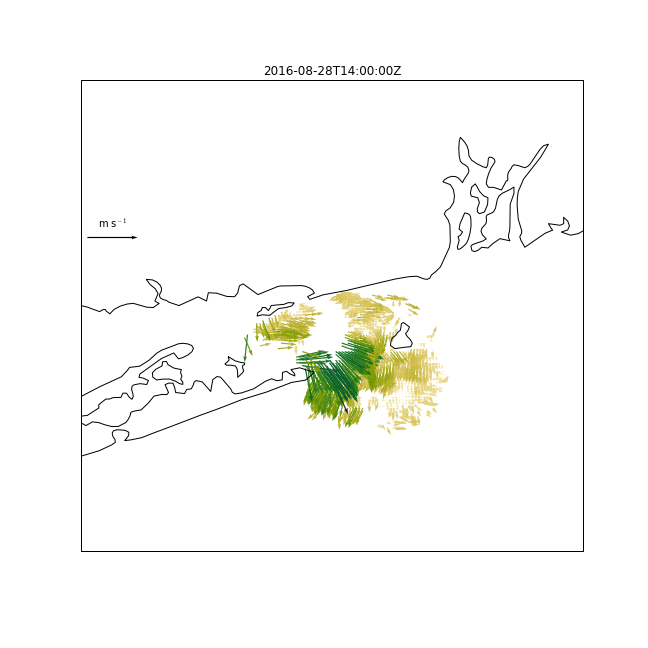
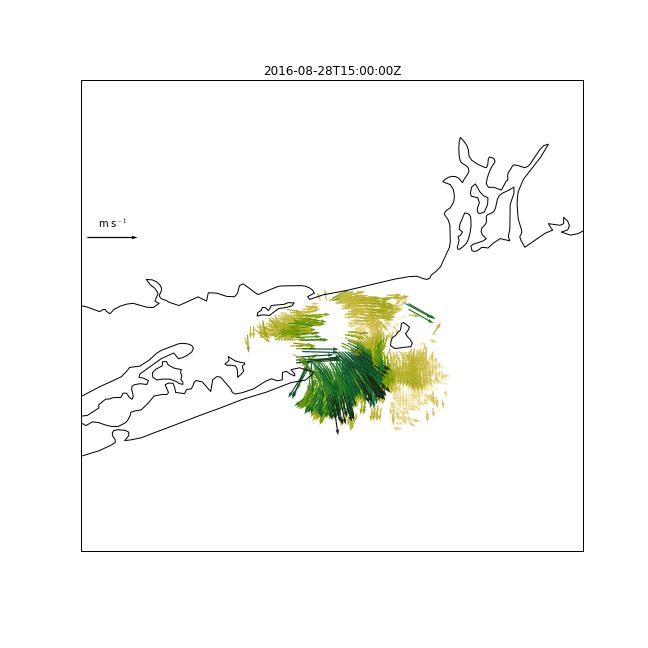
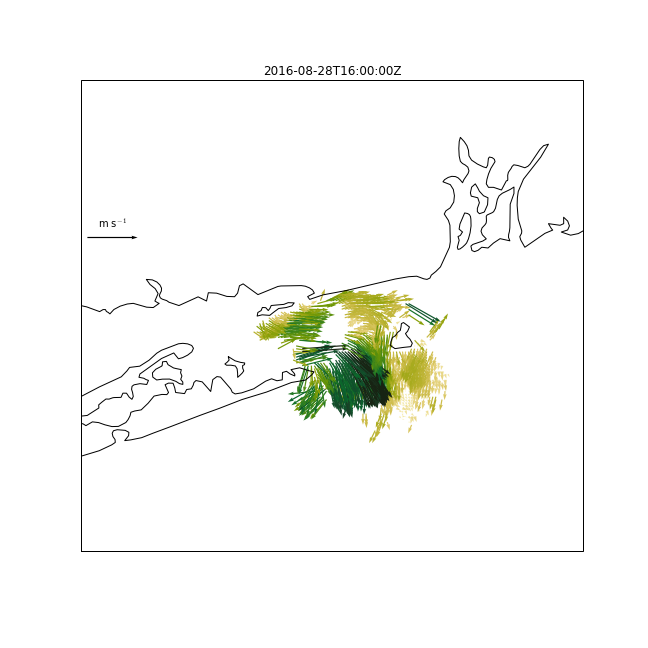
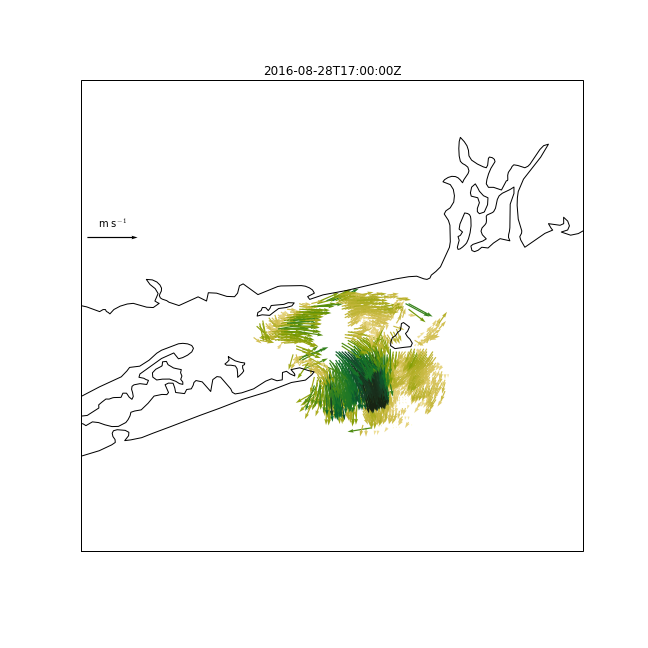
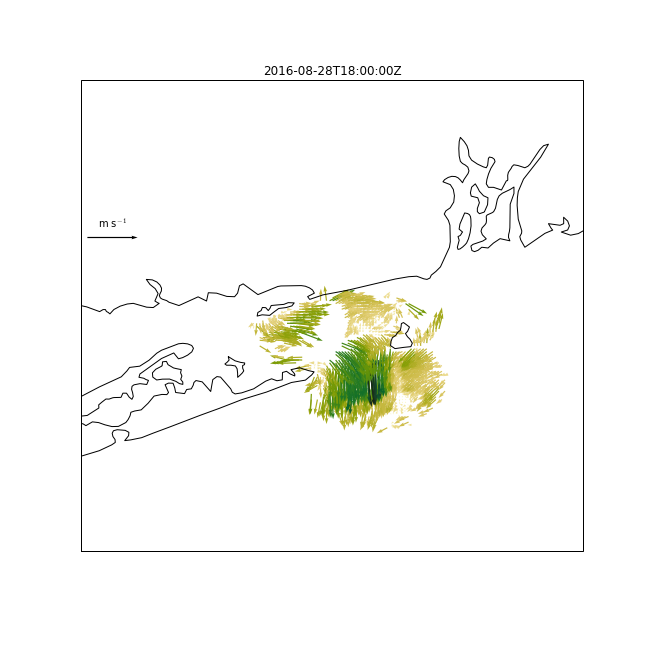
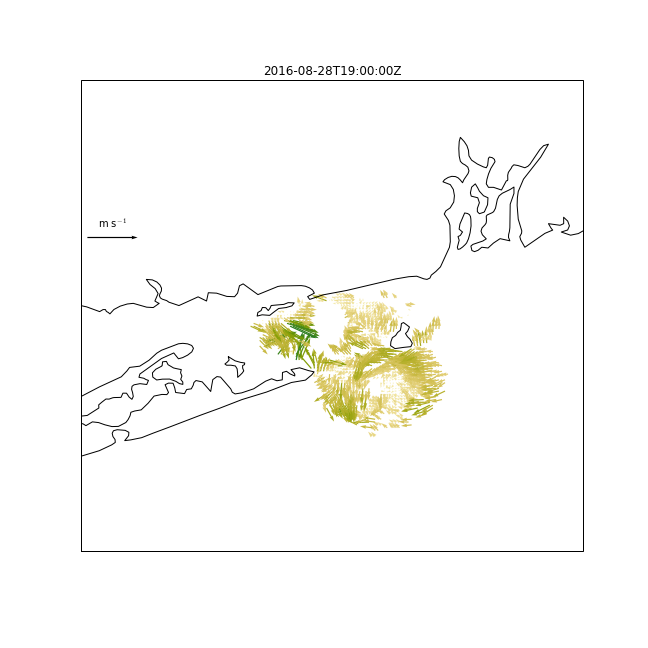
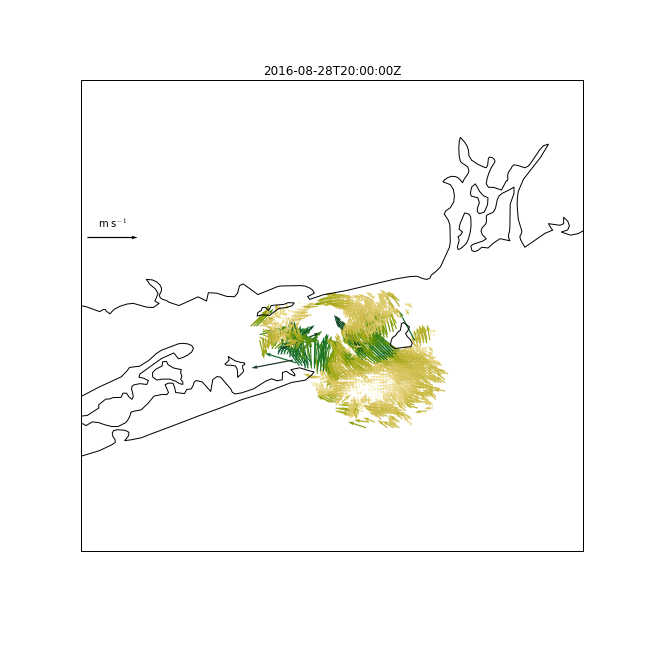
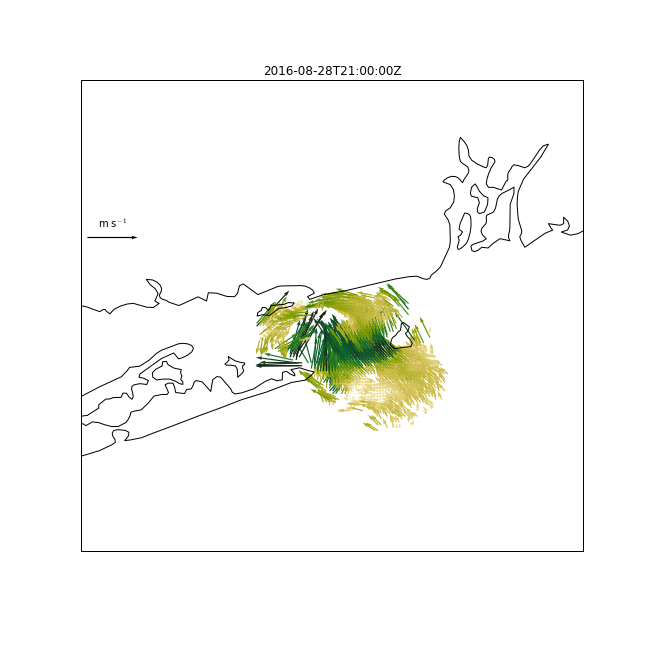
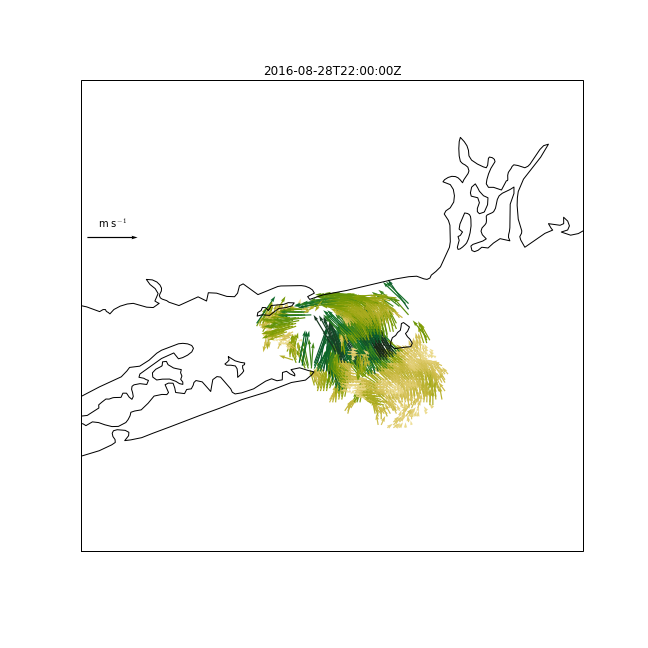
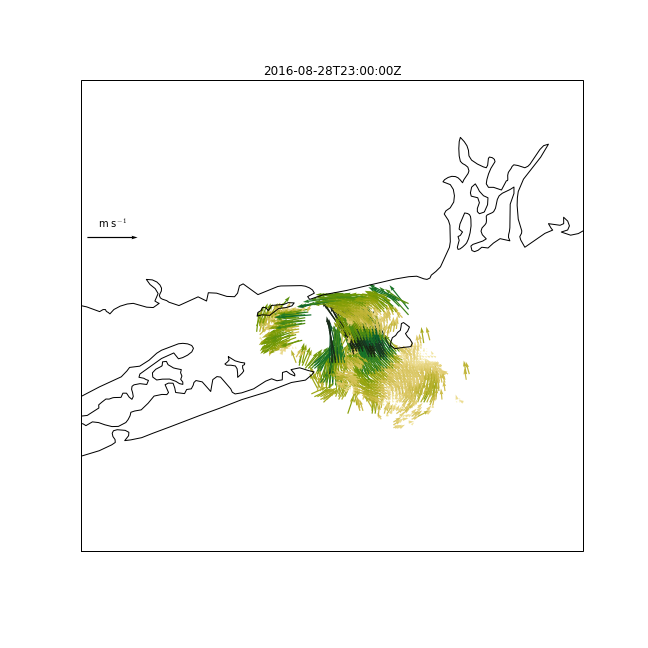
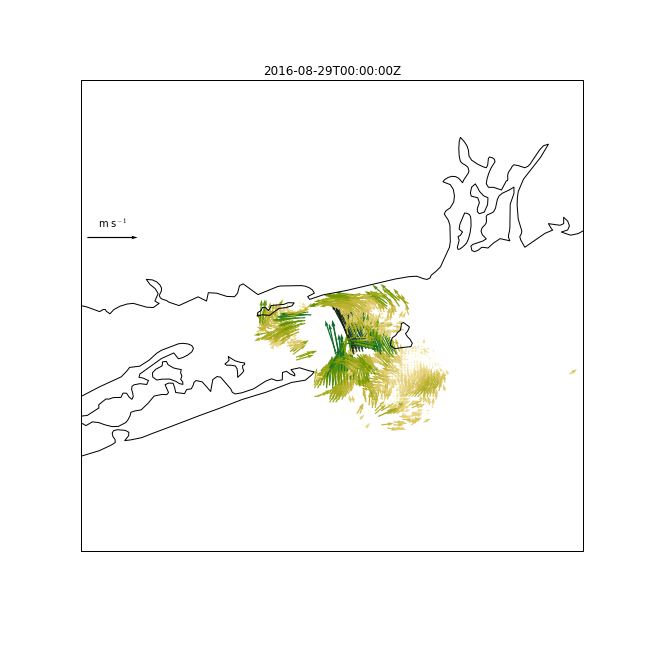
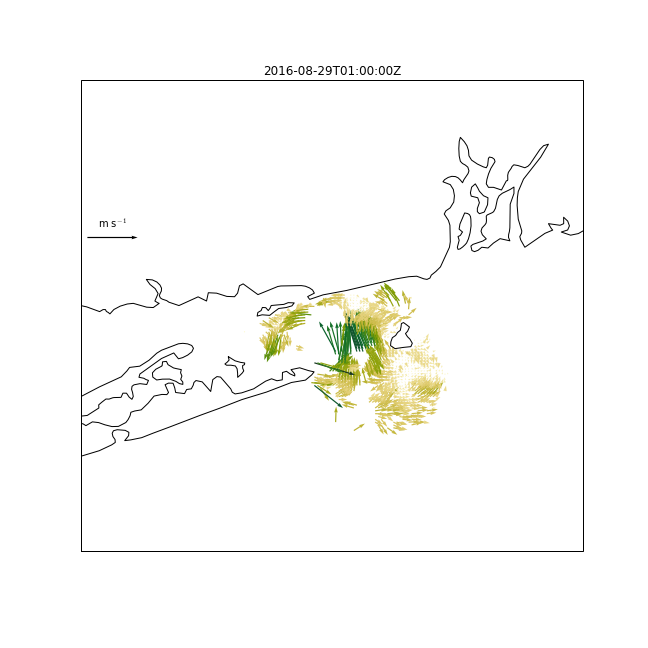
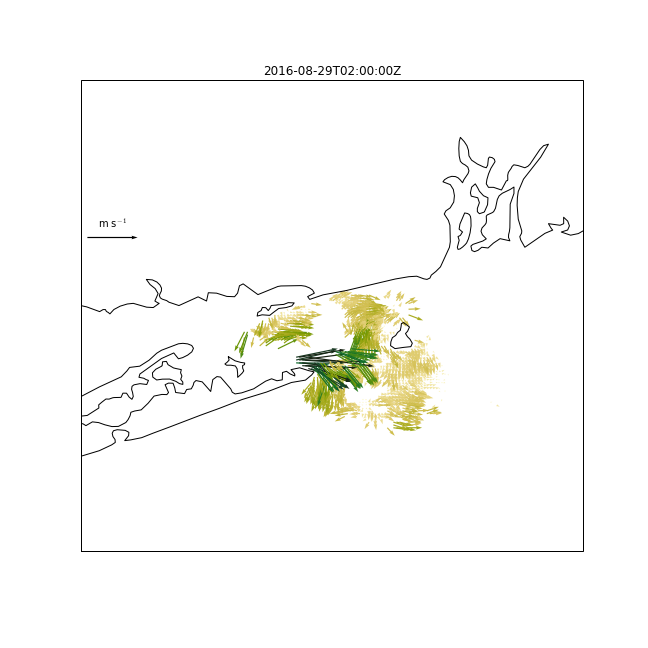
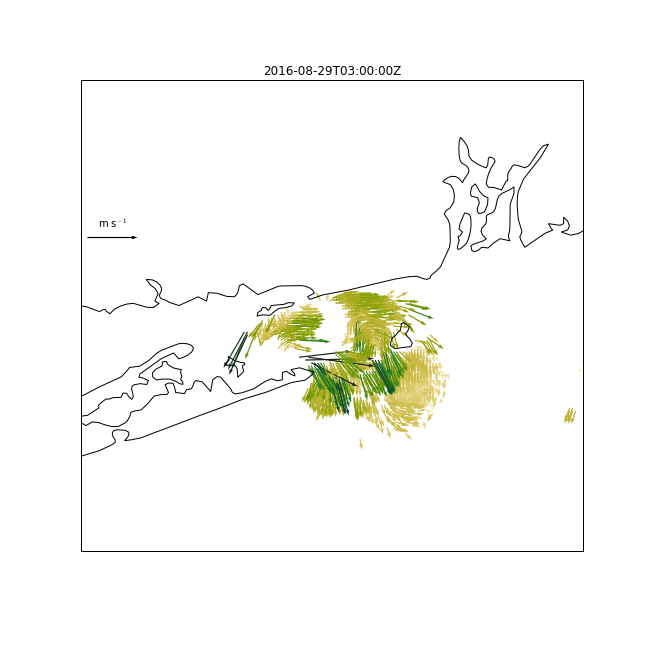
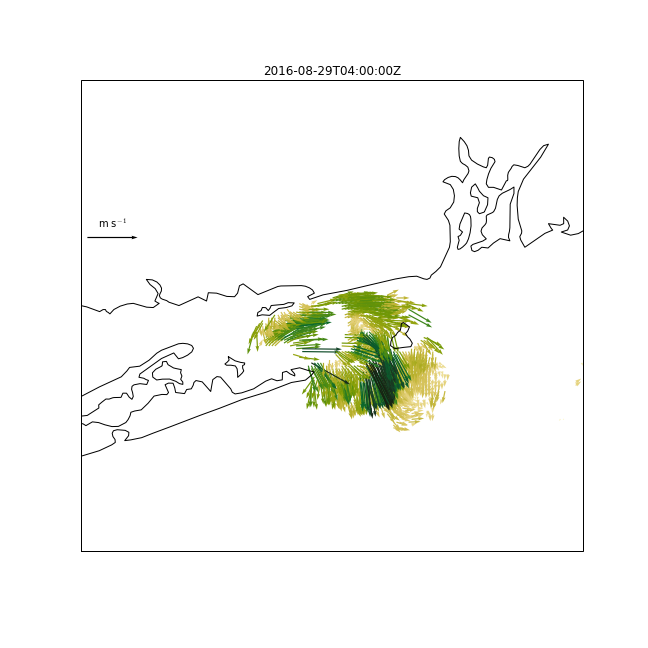
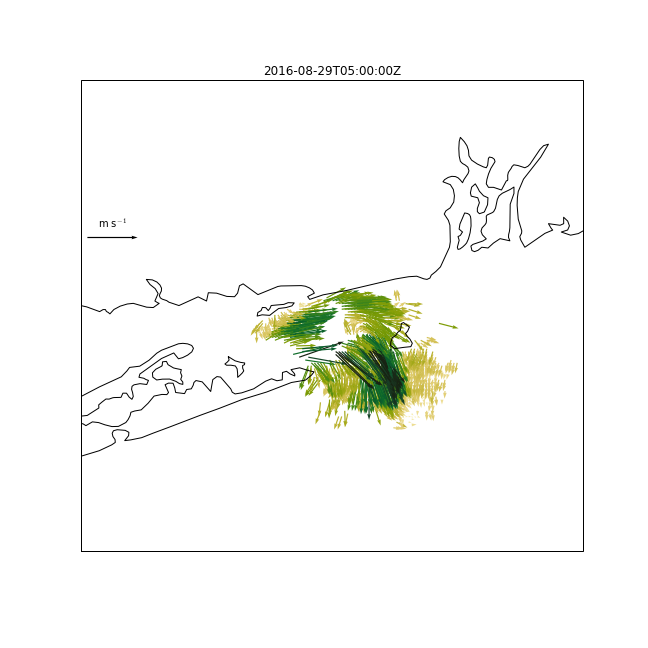
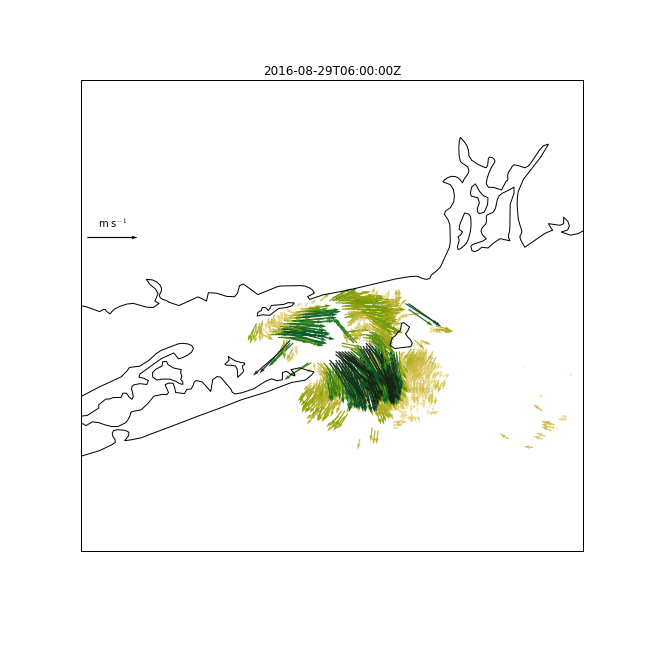
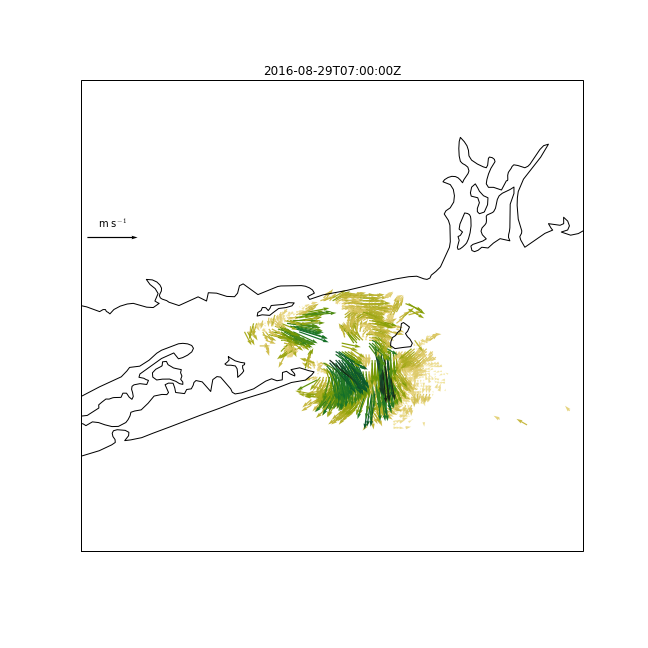
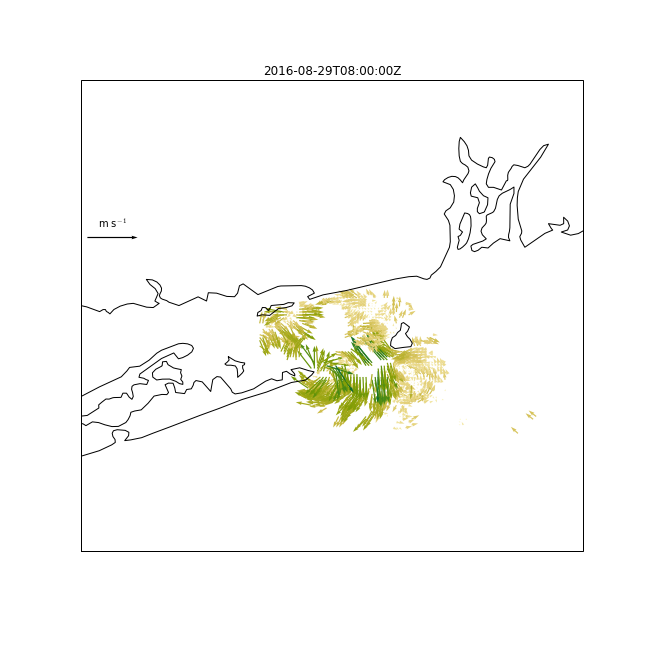
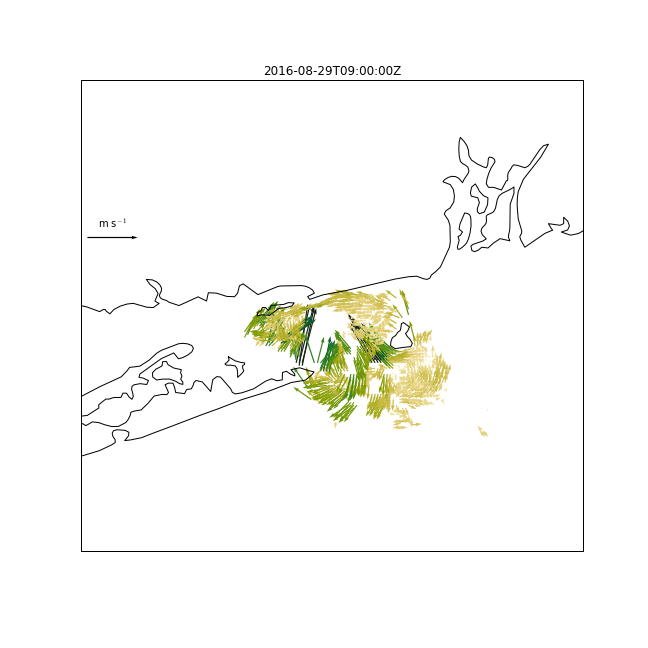
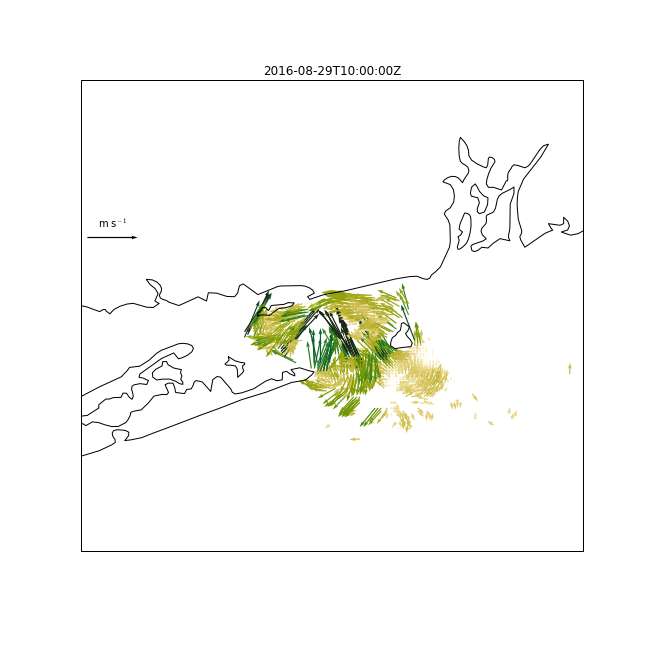
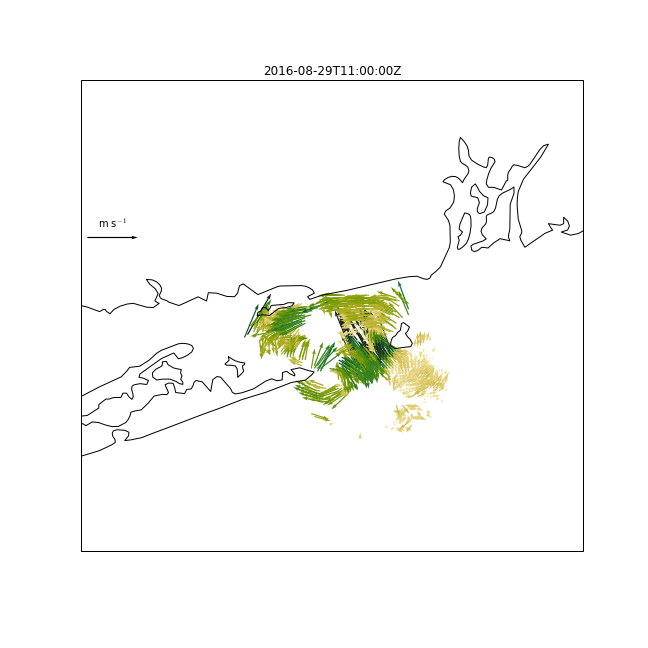
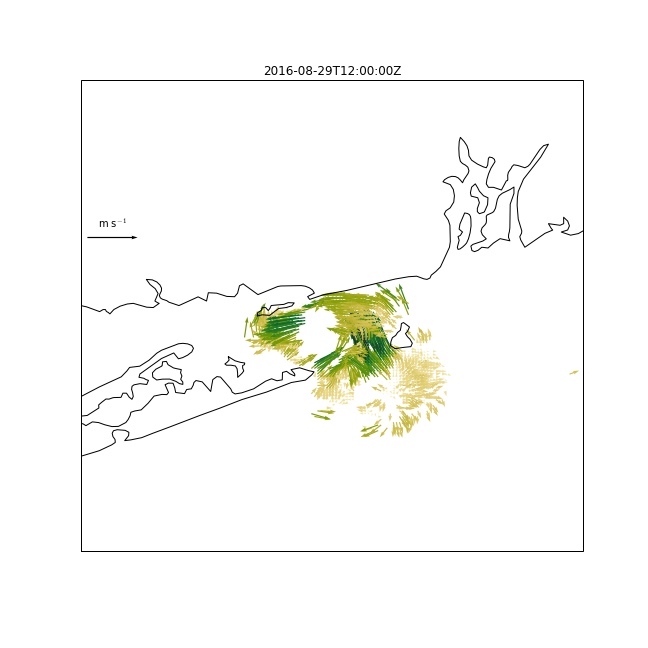
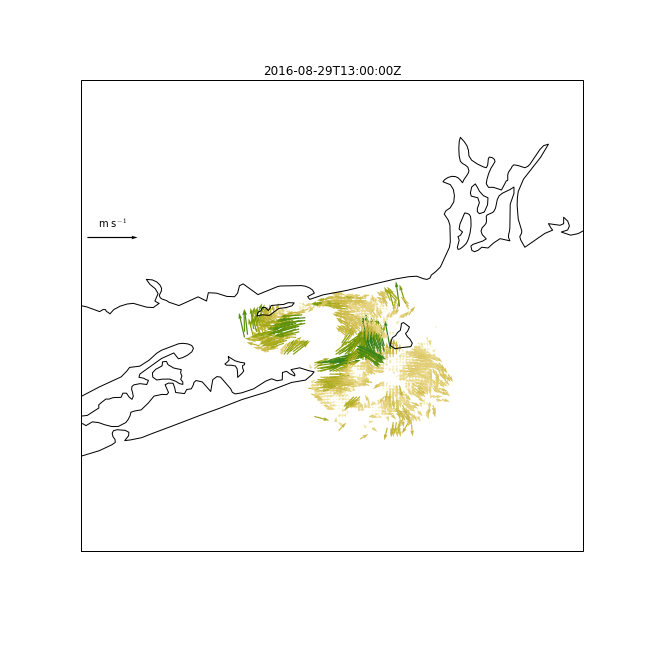
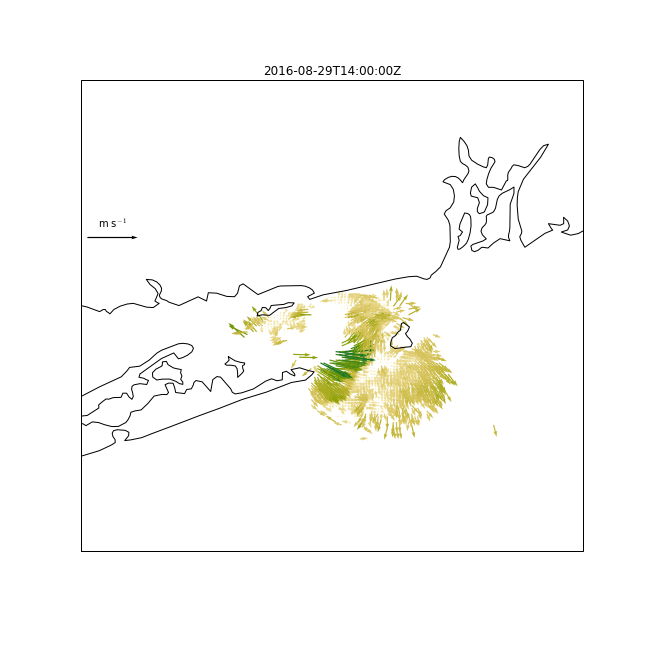
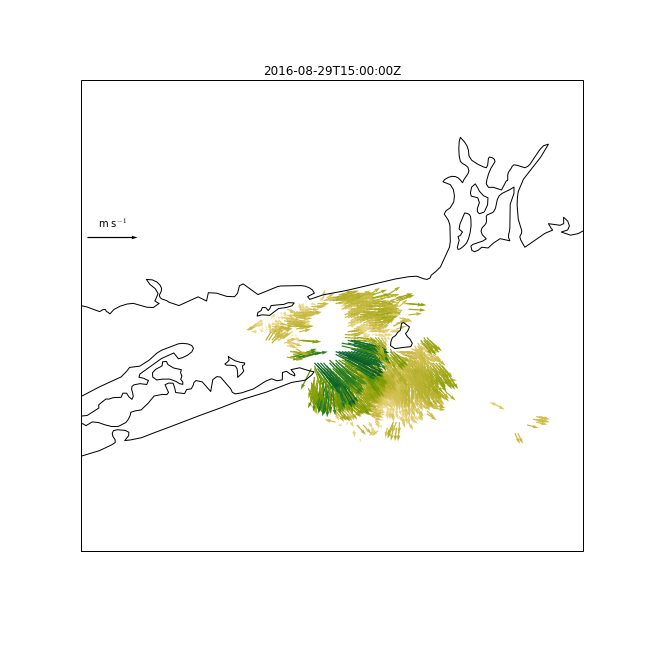
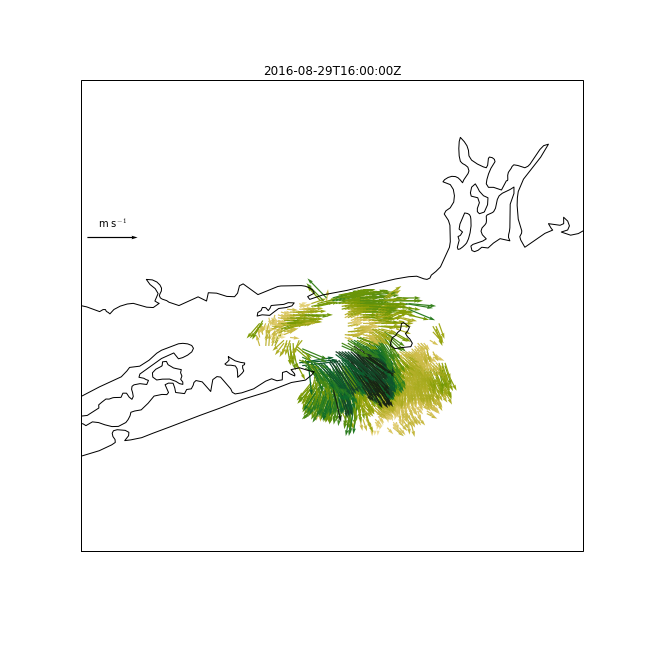
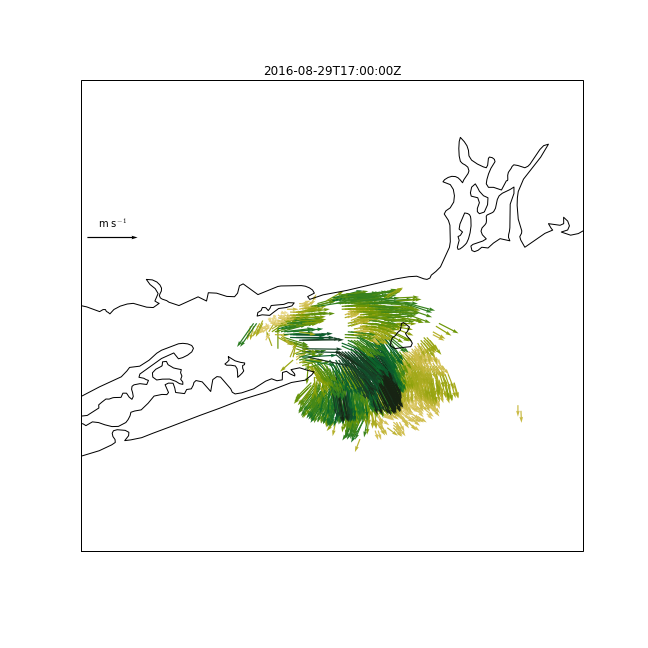
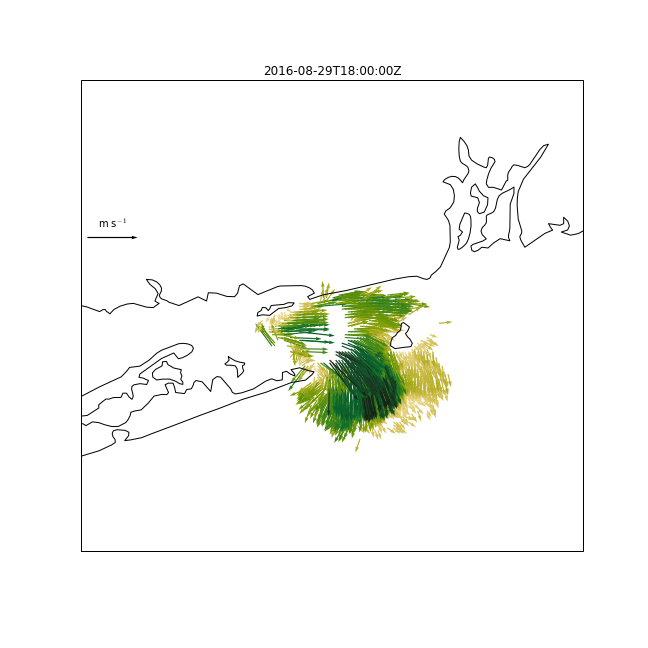
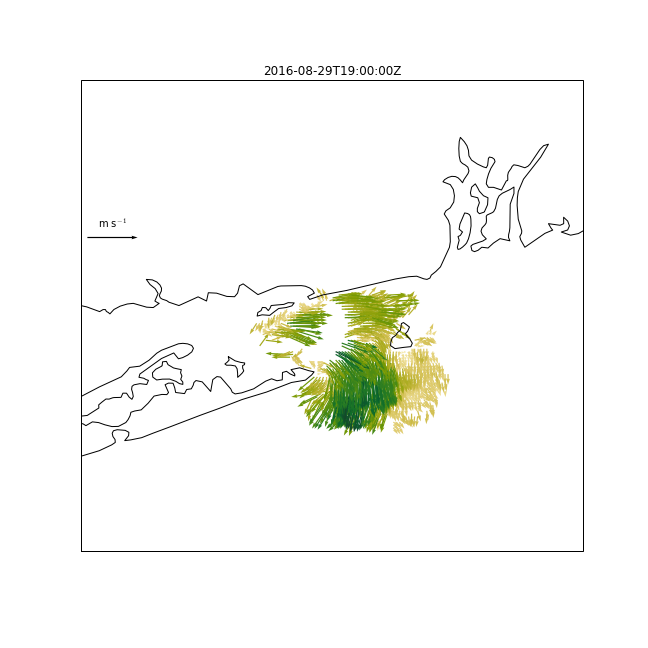
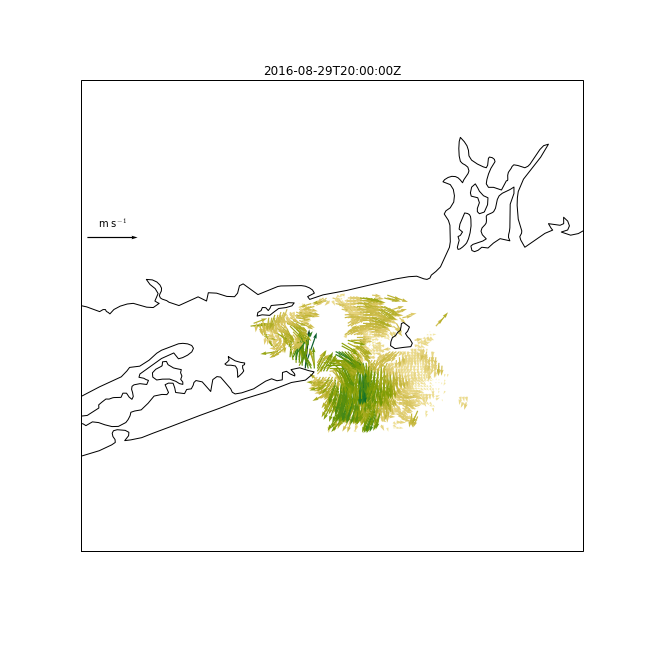
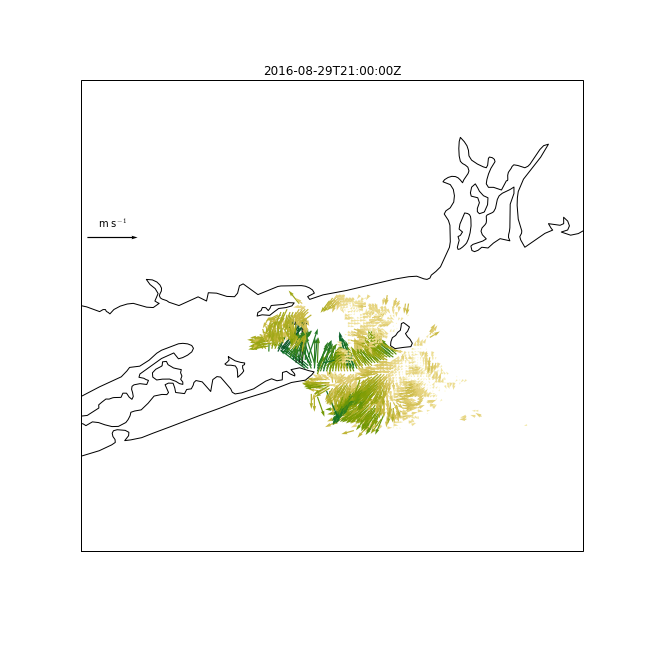
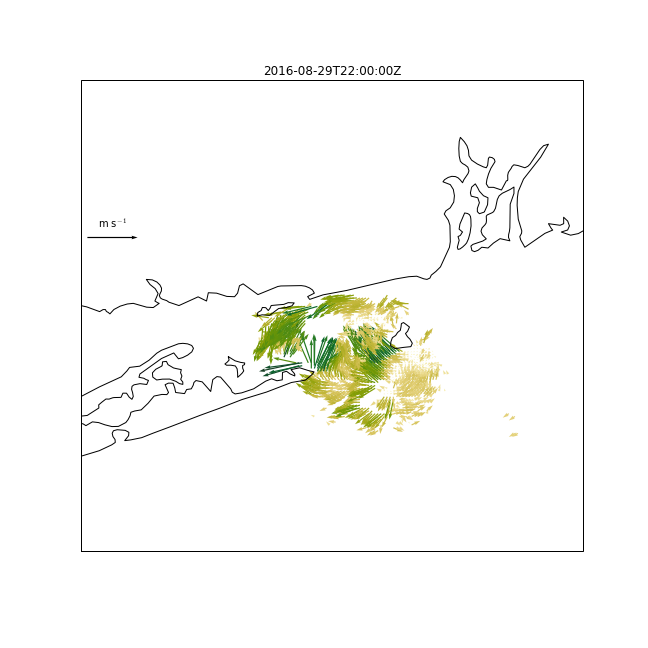
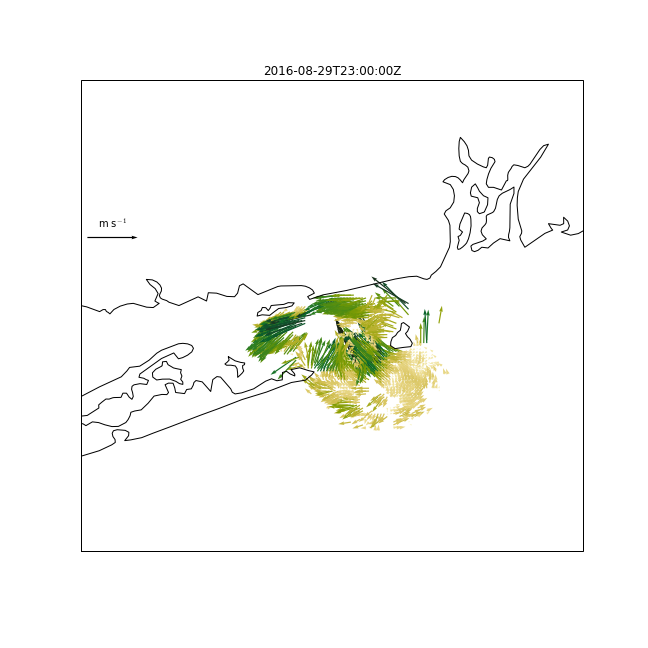
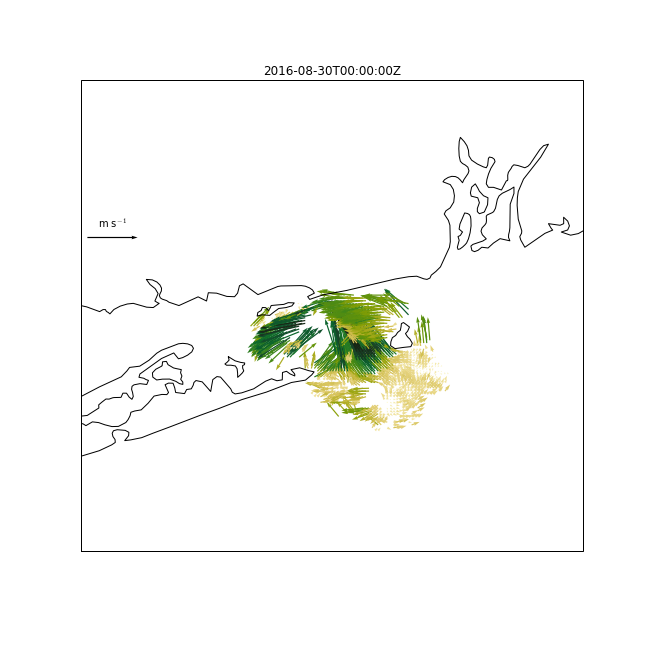
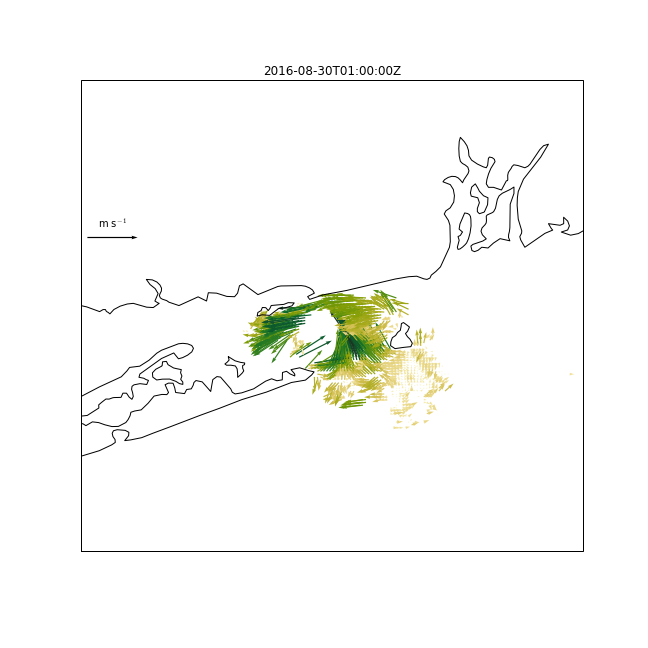
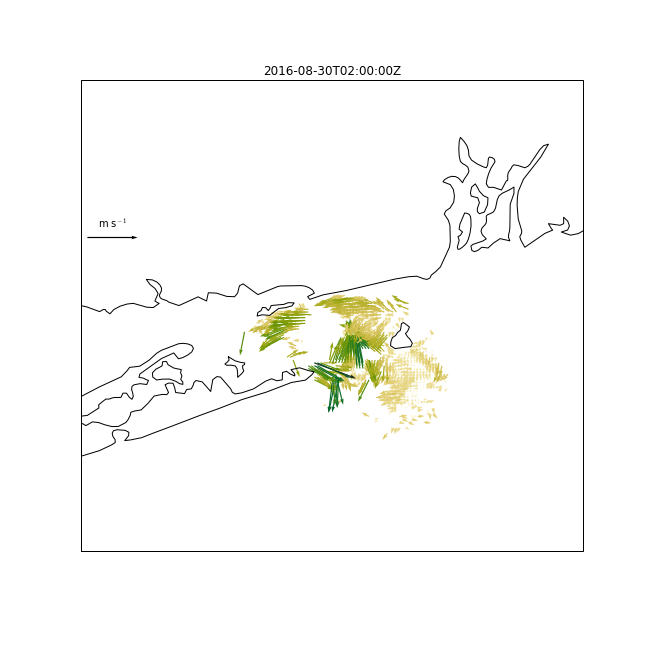
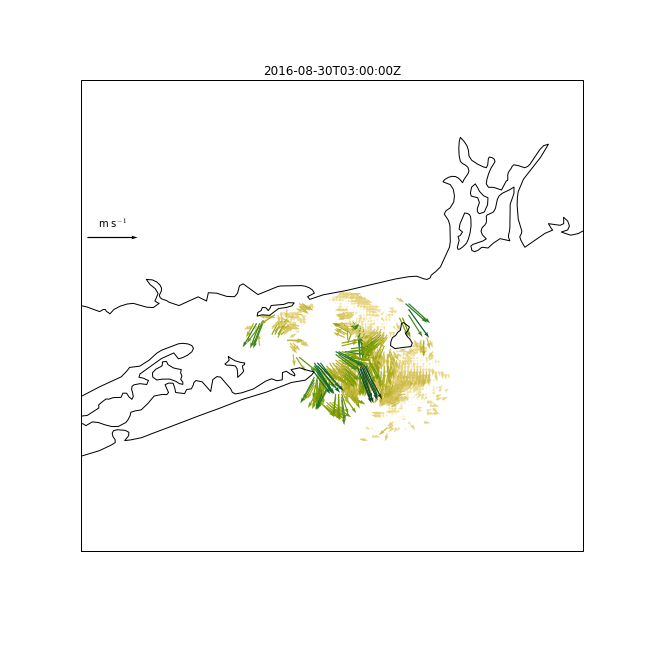
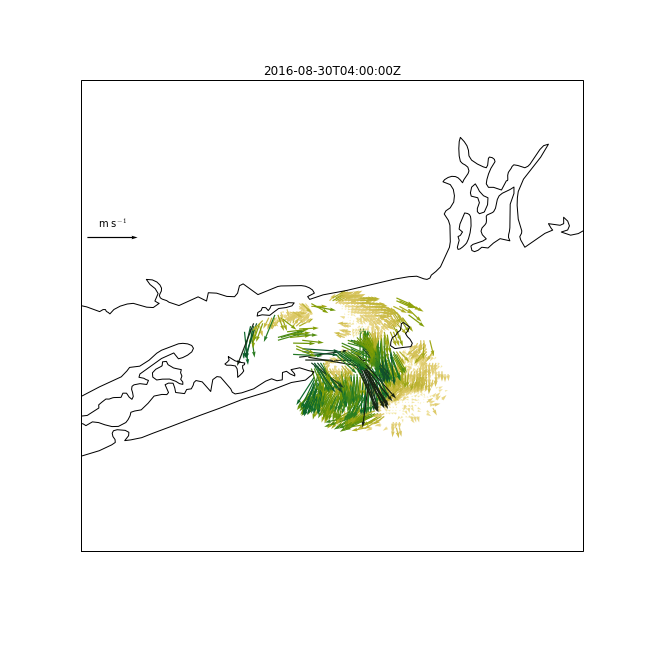
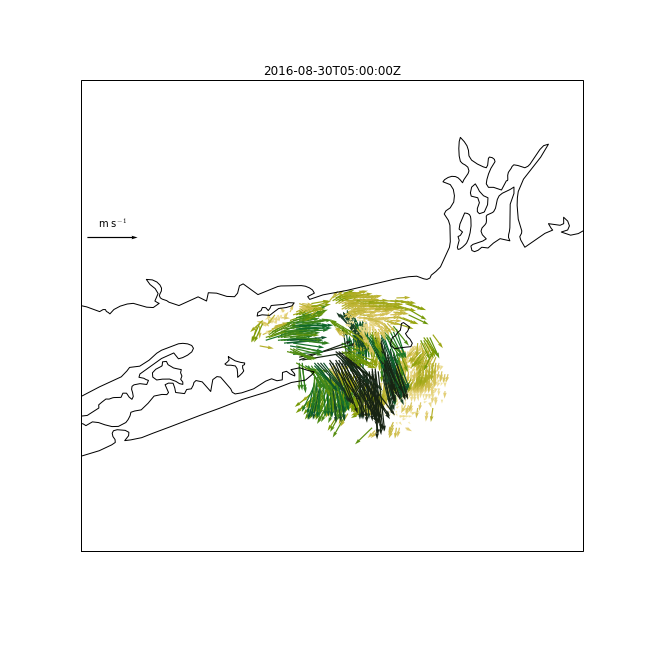
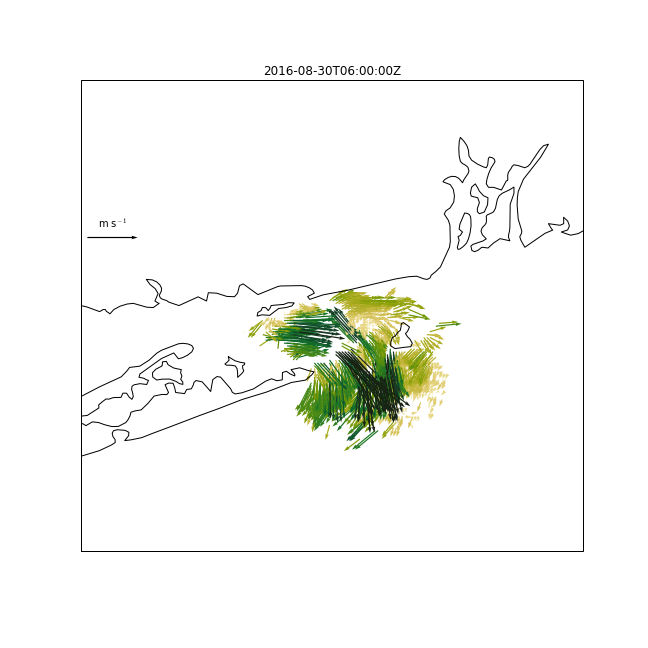
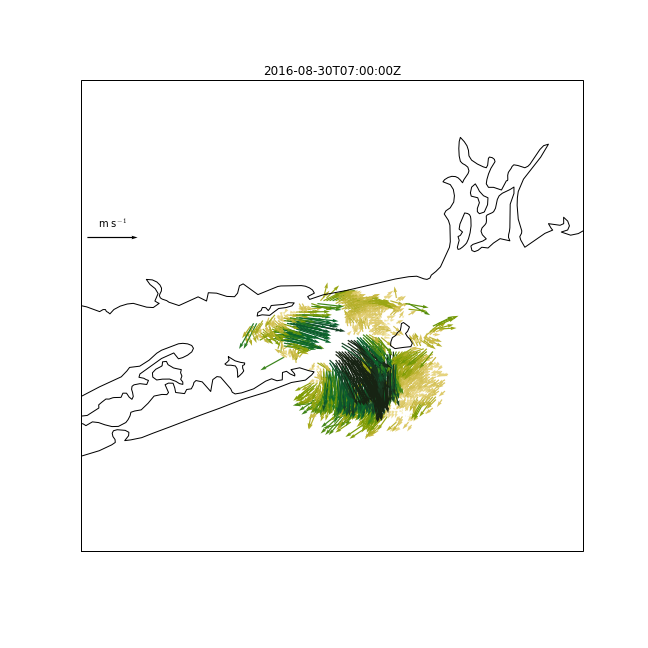
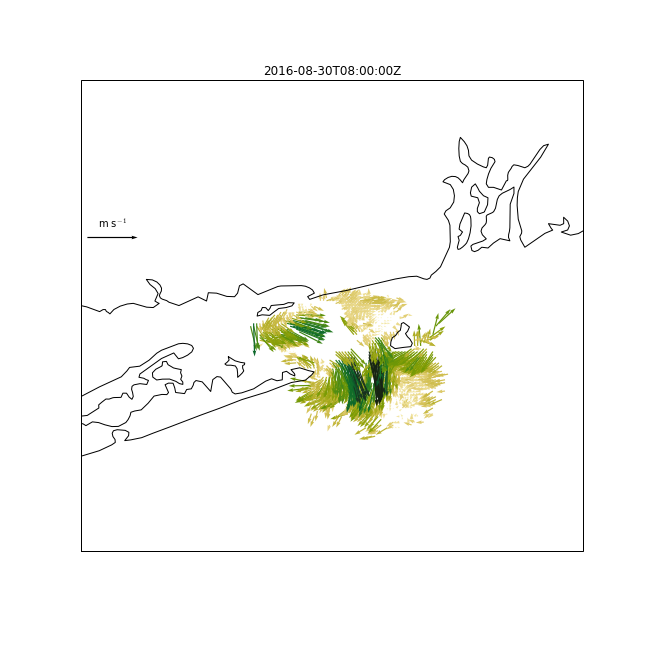
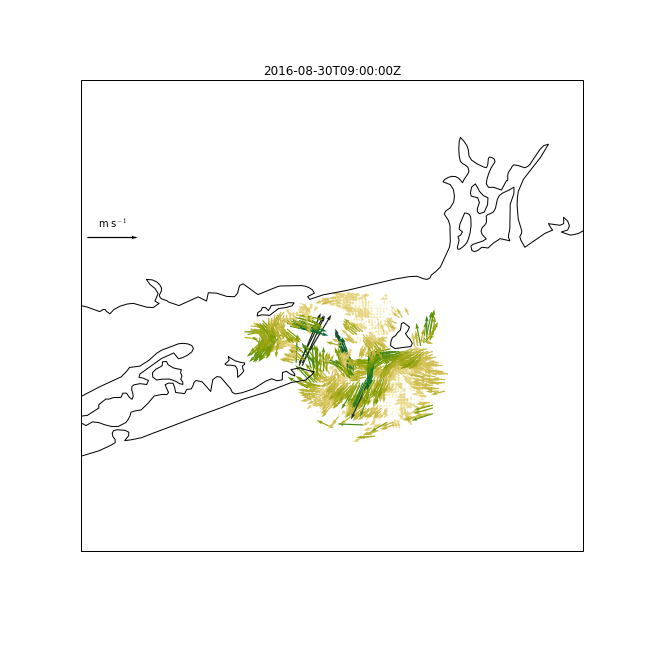
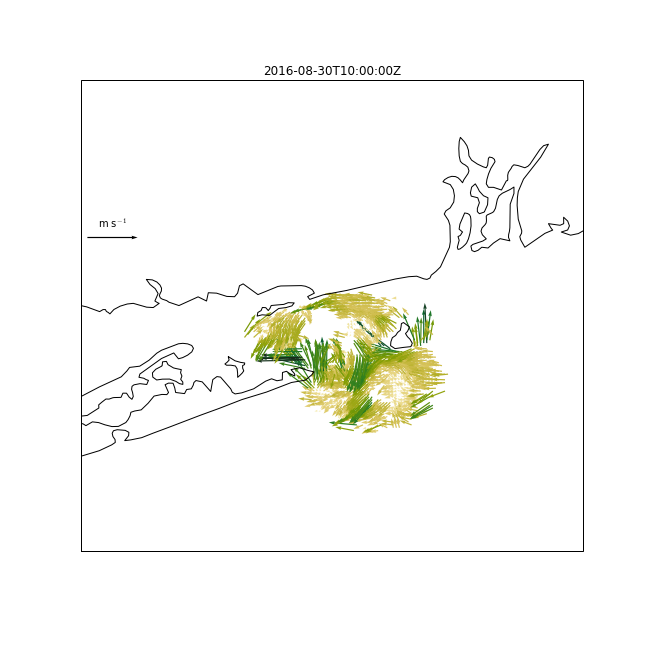
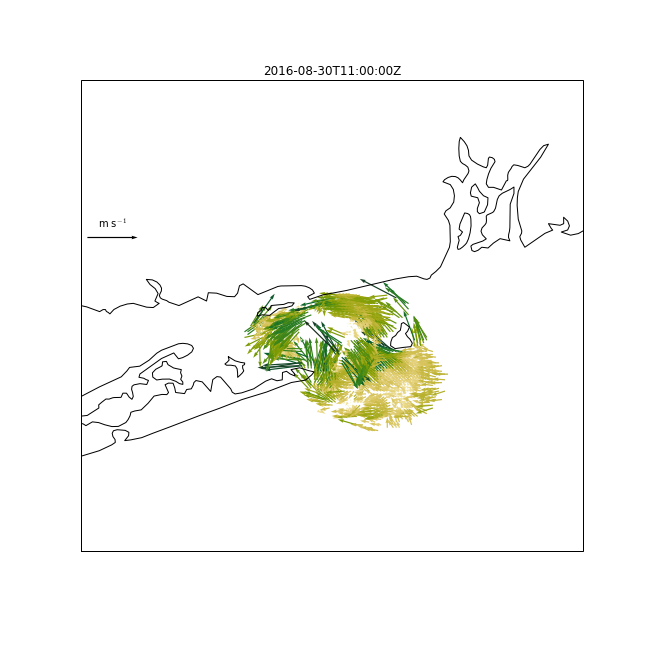
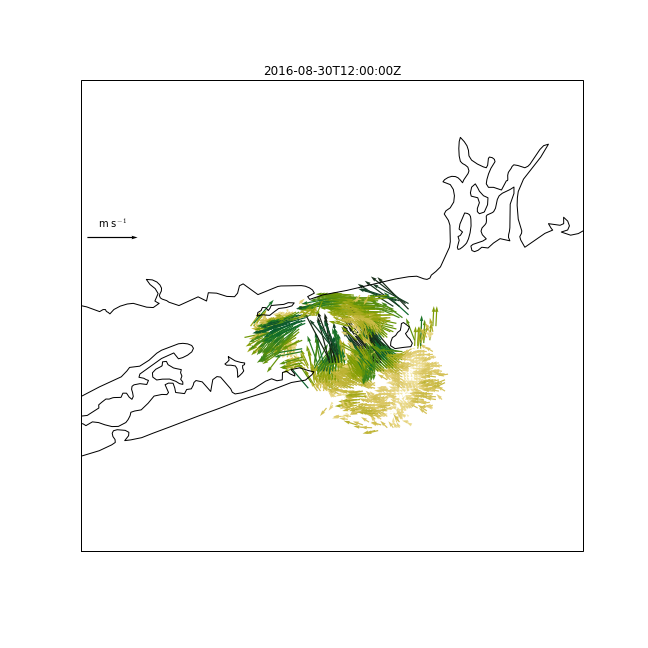
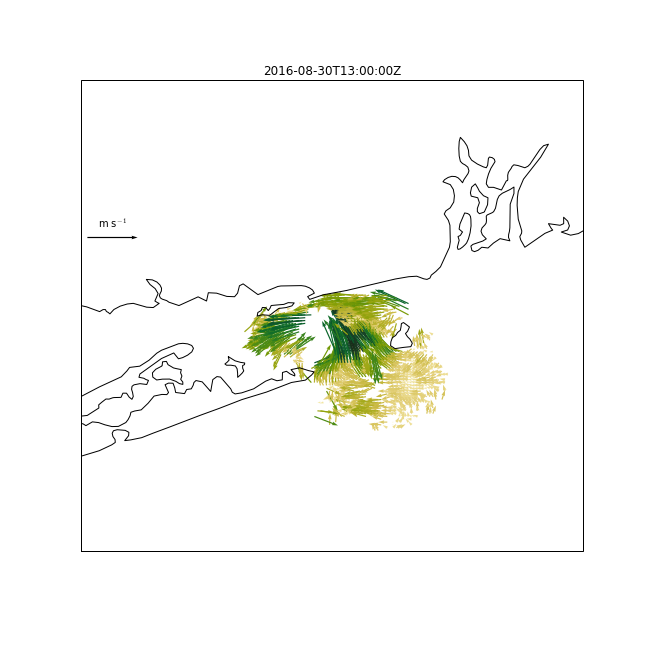
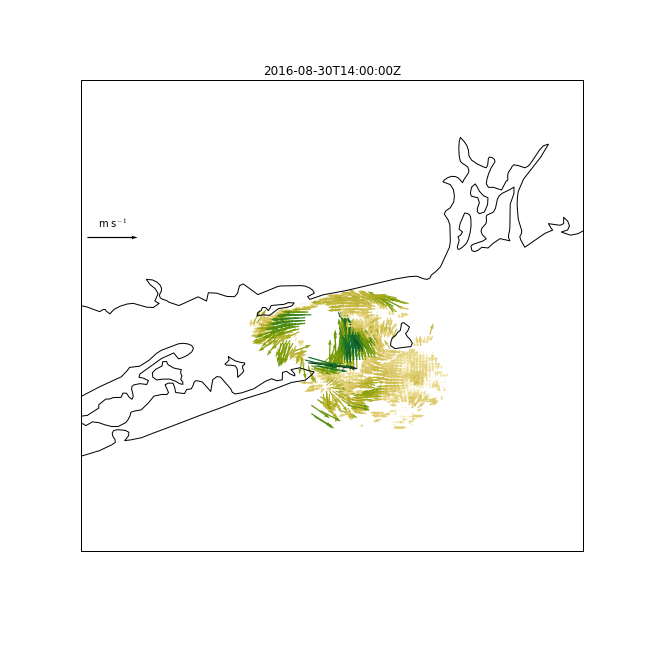
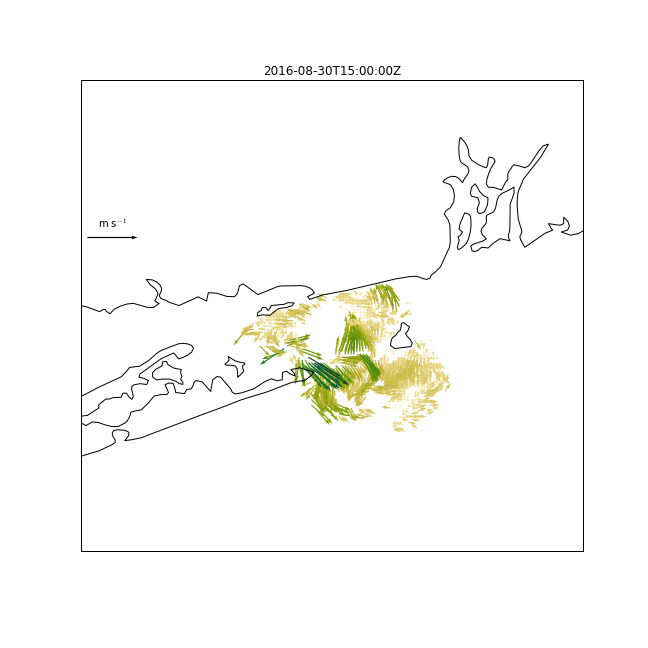
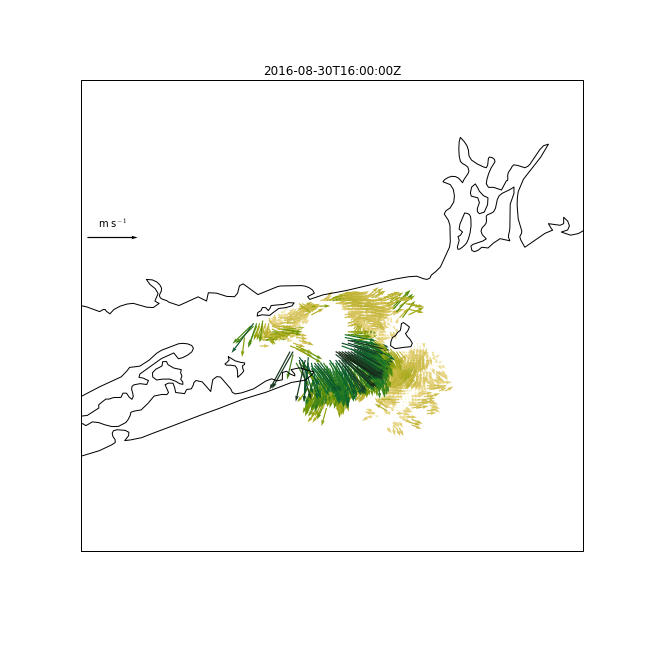
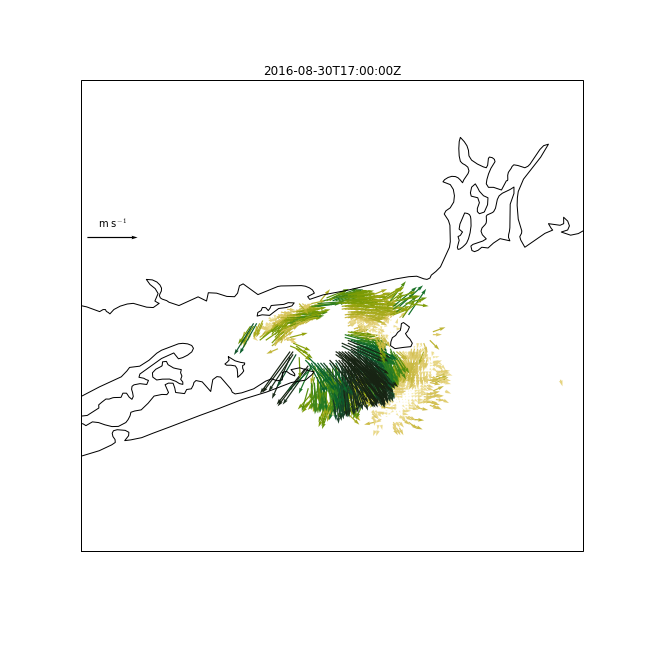
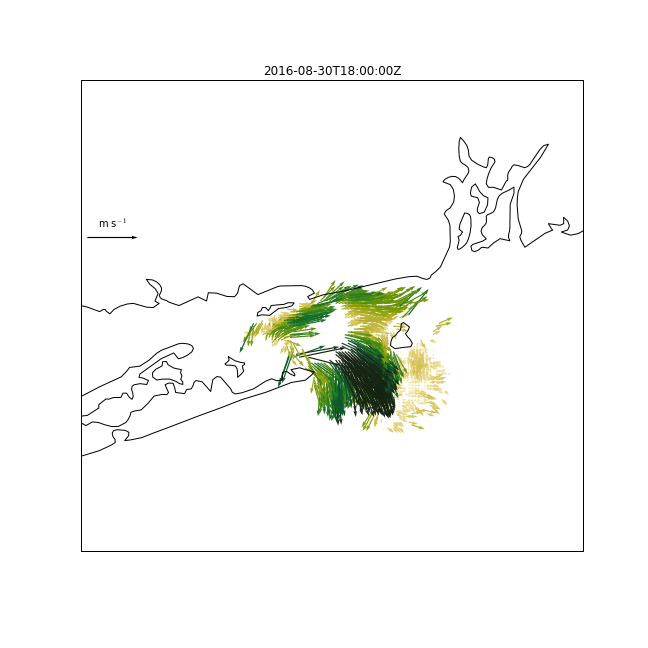
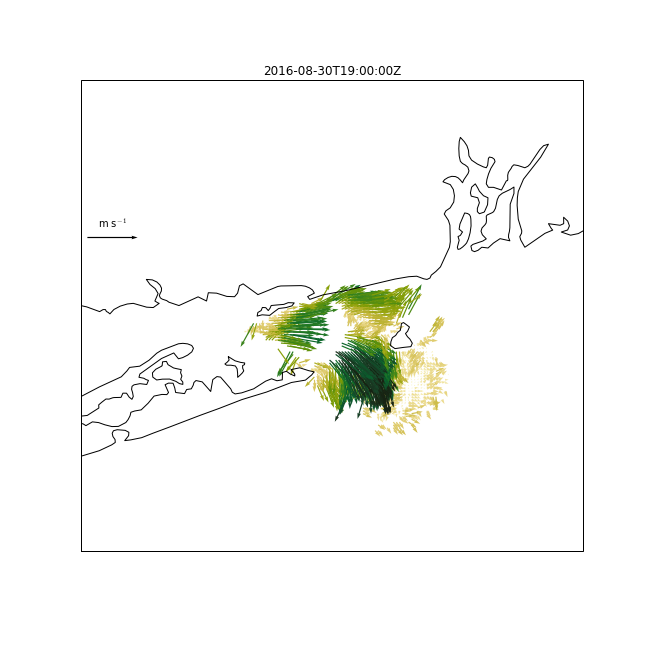
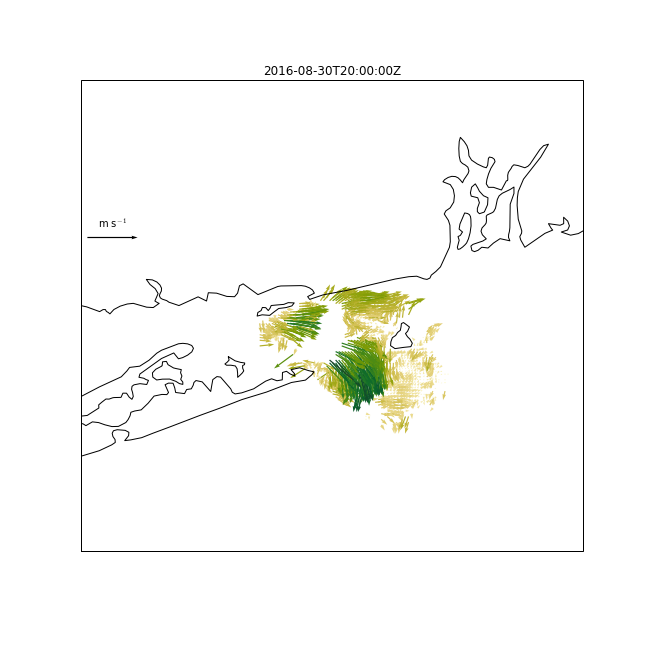
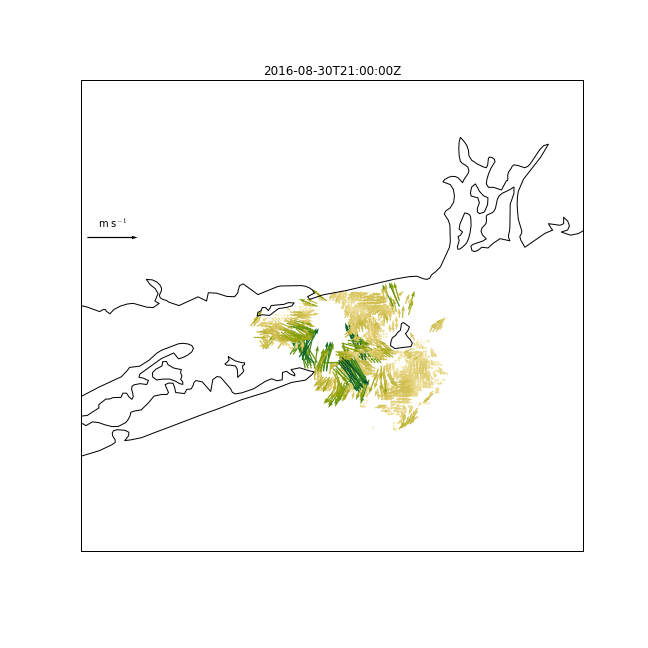
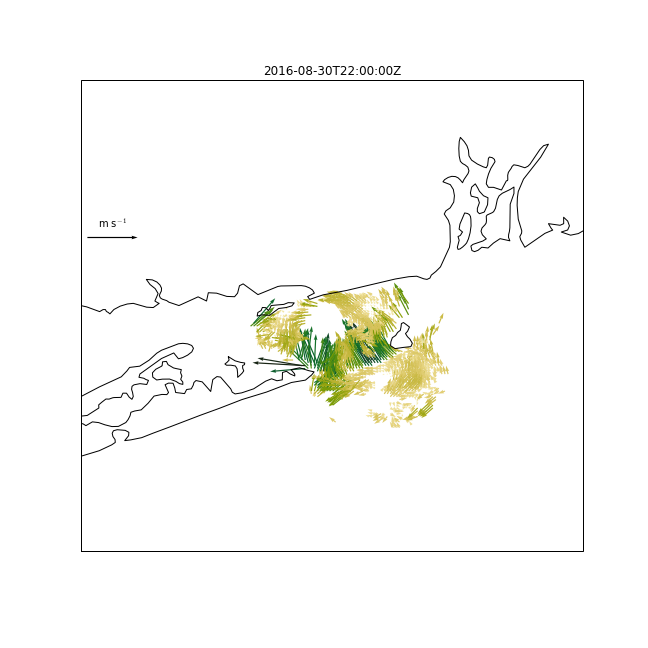
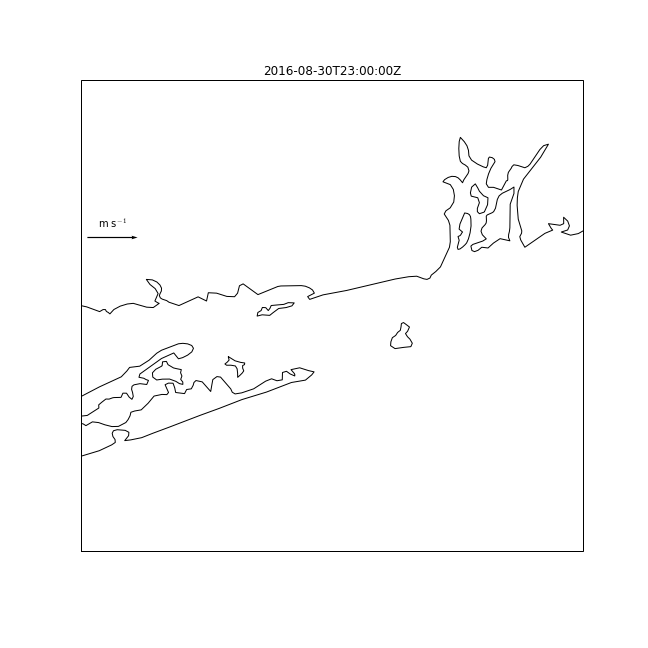

In [20]:
import numpy as np
from JSAnimation import IPython_display
from matplotlib.animation import FuncAnimation


def anim(frames, interval=100):
    # Static.
    fig, ax = plt.subplots(figsize=(9, 9),
                           subplot_kw=dict(projection=ccrs.PlateCarree()))
    ax.coastlines('10m', color='k')
    ax.set_extent([pos['west'], pos['east'], pos['south'], pos['north']])
    # Cartopy does not behave as expected here :-/
    if False:
        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                          linewidth=1.5, color='gray', alpha=0.5, linestyle='--')
        gl = ax.gridlines(draw_labels=True)
        gl.xlabels_top = gl.ylabels_right = False
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
    
    # Animated.
    title = ax.set_title('')
    empty = np.zeros((ndbc_ds['lat'].size, ndbc_ds['lon'].size)) * np.NaN
    Q = ax.quiver(ndbc_ds['lon'], ndbc_ds['lat'], empty, empty, scale=10, cmap=cm.speed)
    
    # Static.
    ax.quiverkey(Q, -72.5, 41.5, 1, r'm s$^{-1}$', coordinates='data')

    def init():
        return Q, title

    def animate(k):
        Q.set_UVC(ndbc_ds['u'][k, ...], ndbc_ds['v'][k, ...], ndbc_ds['speed'][k, ...])
        title = ax.set_title(ndbc_ds['time'][k])
        return Q
    
    return FuncAnimation(fig, animate, init_func=init,
                         frames=frames, interval=interval)

anim(frames=len(ndbc_ds['time']))